In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\ten

In [2]:
# Import input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop Name column since EIN can be used as identifier and is already numeric
charity_df = charity_df.drop(['NAME', 'EIN'], axis=1)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [5]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Display the classification value counts
class_counts = charity_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1283        1
C1900        1
C2600        1
C2190        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

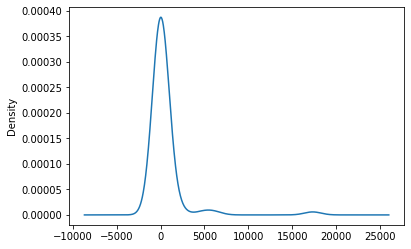

In [7]:
# Visualize the classification counts
class_counts.plot.density()

In [8]:
# Determine which values to replace
replace_class = list(class_counts[class_counts < 2500].index)

# Replace in DataFrame
for classification in replace_class:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [9]:
# Display the application type counts
app_counts = charity_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Determine which values to replace
replace_app = list(app_counts[app_counts < 1000].index)

# Replace in DataFrame
for app in replace_app:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app,"Other")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 78)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425]])

In [35]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                390       
_________________________________________________________________
dense_30 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 8         
Total params: 475
Trainable params: 475
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
   32/25724 [..............................] - ETA: 1:13 - loss: 0.5240 - acc: 0.7812
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.5368 - acc: 0.7406  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3488/25724 [===>..........................] - ETA: 1s - loss: 0.5427 - acc: 0.7357
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5472/25724 [=====>........................] - ETA: 0s - loss: 0.5527 - acc: 0.7275
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7488/25724 [=======>......................] - ETA: 0s - loss: 0.5516 - acc: 0.7305
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 9344/25724 [=========>....................] - 

   32/25724 [..............................] - ETA: 1s - loss: 0.5984 - acc: 0.6250
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1888/25724 [=>............................] - ETA: 0s - loss: 0.5436 - acc: 0.7394
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5513 - acc: 0.7317
Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5728/25724 [=====>........................] - ETA: 0s - loss: 0.5500 - acc: 0.7341
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 7648/25724 [=======>......................] - ETA: 0s - loss: 0.5497 - acc: 0.7337
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9536/25724 [==========>...................] - ETA: 0s - loss: 

 1824/25724 [=>............................] - ETA: 0s - loss: 0.5564 - acc: 0.7242
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 3552/25724 [===>..........................] - ETA: 0s - loss: 0.5566 - acc: 0.7289
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 5472/25724 [=====>........................] - ETA: 0s - loss: 0.5577 - acc: 0.7286
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5515 - acc: 0.7341
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9312/25724 [=========>....................] - ETA: 0s - loss: 0.5494 - acc: 0.7353
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
11104/25724 [===========>..................] - ETA: 0s - loss: 

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5384 - acc: 0.7437
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 3936/25724 [===>..........................] - ETA: 0s - loss: 0.5354 - acc: 0.7421
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5696/25724 [=====>........................] - ETA: 0s - loss: 0.5402 - acc: 0.7417
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5439 - acc: 0.7394
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9440/25724 [==========>...................] - ETA: 0s - loss: 0.5436 - acc: 0.7394
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
11264/

 1760/25724 [=>............................] - ETA: 0s - loss: 0.5405 - acc: 0.7455
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5487 - acc: 0.7366
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5495 - acc: 0.7377
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7680/25724 [=======>......................] - ETA: 0s - loss: 0.5466 - acc: 0.7393
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5476 - acc: 0.7393
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
11776


Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5600/25724 [=====>........................] - ETA: 0s - loss: 0.5514 - acc: 0.7359
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5491 - acc: 0.7363
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5496 - acc: 0.7339
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11360/25724 [============>.................] - ETA: 0s - loss: 0.5489 - acc: 0.7349
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
13152/25724 [==============>...............] - ETA: 0s - loss: 0.5507 - acc: 0.7327
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
14912

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5888/25724 [=====>........................] - ETA: 0s - loss: 0.5465 - acc: 0.7401
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7936/25724 [========>.....................] - ETA: 0s - loss: 0.5459 - acc: 0.7399
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5466 - acc: 0.7383
Epoch 00019: saving model to checkpoints/weights.19.hdf5
11968/25724 [============>.................] - ETA: 0s - loss: 0.5500 - acc: 0.7361
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
13856/25724 [===============>..............] - ETA: 0s - loss: 0.5504 - acc: 0.7350
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch


Epoch 00022: saving model to checkpoints/weights.22.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5560 - acc: 0.7293
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5510 - acc: 0.7352
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5495 - acc: 0.7361
Epoch 00022: saving model to checkpoints/weights.22.hdf5
11584/25724 [============>.................] - ETA: 0s - loss: 0.5495 - acc: 0.7347
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
13408/25724 [==============>...............] - ETA: 0s - loss: 0.5491 - acc: 0.7346
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
15136

 7456/25724 [=======>......................] - ETA: 0s - loss: 0.5514 - acc: 0.7322
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5537 - acc: 0.7316
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5512 - acc: 0.7330
Epoch 00025: saving model to checkpoints/weights.25.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5513 - acc: 0.7323
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
14944/25724 [================>.............] - ETA: 0s - loss: 0.5517 - acc: 0.7315
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
16800/25724 [==================>...........] - ETA: 0s - loss: 

 7456/25724 [=======>......................] - ETA: 0s - loss: 0.5455 - acc: 0.7339
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 9248/25724 [=========>....................] - ETA: 0s - loss: 0.5469 - acc: 0.7324
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
11104/25724 [===========>..................] - ETA: 0s - loss: 0.5453 - acc: 0.7353
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5472 - acc: 0.7341
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5497 - acc: 0.7333
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
17024

 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5504 - acc: 0.7329
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 9440/25724 [==========>...................] - ETA: 0s - loss: 0.5484 - acc: 0.7344
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5476 - acc: 0.7341
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
13216/25724 [==============>...............] - ETA: 0s - loss: 0.5471 - acc: 0.7349
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
15072/25724 [================>.............] - ETA: 0s - loss: 0.5439 - acc: 0.7375
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
16800/25724 [==================>...........] - ETA: 0s - loss: 

 7584/25724 [=======>......................] - ETA: 0s - loss: 0.5502 - acc: 0.7354
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 9376/25724 [=========>....................] - ETA: 0s - loss: 0.5502 - acc: 0.7349
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
11168/25724 [============>.................] - ETA: 0s - loss: 0.5514 - acc: 0.7345
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5528 - acc: 0.7342
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5537 - acc: 0.7324
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
17280

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 9184/25724 [=========>....................] - ETA: 0s - loss: 0.5514 - acc: 0.7326
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10944/25724 [===========>..................] - ETA: 0s - loss: 0.5502 - acc: 0.7329
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5499 - acc: 0.7327
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5497 - acc: 0.7334
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5509 - acc: 0.7328
Epoch 00037: saving model to checkpoints/weights.37.hdf5
18816/


Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9504/25724 [==========>...................] - ETA: 0s - loss: 0.5427 - acc: 0.7384
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5470 - acc: 0.7353
Epoch 00040: saving model to checkpoints/weights.40.hdf5
13376/25724 [==============>...............] - ETA: 0s - loss: 0.5471 - acc: 0.7355
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
15200/25724 [================>.............] - ETA: 0s - loss: 0.5482 - acc: 0.7341
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5493 - acc: 0.7343
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
18848

 9440/25724 [==========>...................] - ETA: 0s - loss: 0.5495 - acc: 0.7325
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
11328/25724 [============>.................] - ETA: 0s - loss: 0.5535 - acc: 0.7282
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
13152/25724 [==============>...............] - ETA: 0s - loss: 0.5521 - acc: 0.7300
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5545 - acc: 0.7291
Epoch 00043: saving model to checkpoints/weights.43.hdf5
17120/25724 [==================>...........] - ETA: 0s - loss: 0.5539 - acc: 0.7298
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 

 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5489 - acc: 0.7329
Epoch 00046: saving model to checkpoints/weights.46.hdf5
11616/25724 [============>.................] - ETA: 0s - loss: 0.5480 - acc: 0.7336
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
13472/25724 [==============>...............] - ETA: 0s - loss: 0.5500 - acc: 0.7320
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
15296/25724 [================>.............] - ETA: 0s - loss: 0.5466 - acc: 0.7349
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
17120/25724 [==================>...........] - ETA: 0s - loss: 0.5472 - acc: 0.7352
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 

11456/25724 [============>.................] - ETA: 0s - loss: 0.5454 - acc: 0.7373
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5486 - acc: 0.7351
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5501 - acc: 0.7343
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5527 - acc: 0.7318
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5506 - acc: 0.7338
Epoch 00049: saving model to checkpoints/weights.49.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 

11232/25724 [============>.................] - ETA: 0s - loss: 0.5559 - acc: 0.7319
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
12960/25724 [==============>...............] - ETA: 0s - loss: 0.5529 - acc: 0.7338
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5546 - acc: 0.7316
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5547 - acc: 0.7320
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5548 - acc: 0.7304
Epoch 00052: saving model to checkpoints/weights.52.hdf5
20896/25724 [=======================>......] - ETA: 0s - loss: 

13088/25724 [==============>...............] - ETA: 0s - loss: 0.5558 - acc: 0.7312
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
15008/25724 [================>.............] - ETA: 0s - loss: 0.5530 - acc: 0.7332
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5512 - acc: 0.7345
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5490 - acc: 0.7359
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5502 - acc: 0.7343
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
22784

13344/25724 [==============>...............] - ETA: 0s - loss: 0.5491 - acc: 0.7352
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5492 - acc: 0.7353
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5511 - acc: 0.7335
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5505 - acc: 0.7338
Epoch 00058: saving model to checkpoints/weights.58.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.5508 - acc: 0.7341
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 

15488/25724 [=================>............] - ETA: 0s - loss: 0.5466 - acc: 0.7377
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5466 - acc: 0.7380
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
19232/25724 [=====================>........] - ETA: 0s - loss: 0.5487 - acc: 0.7362
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21152/25724 [=======================>......] - ETA: 0s - loss: 0.5484 - acc: 0.7361
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5495 - acc: 0.7346
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
25724

16640/25724 [==================>...........] - ETA: 0s - loss: 0.5496 - acc: 0.7328
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
18560/25724 [====================>.........] - ETA: 0s - loss: 0.5501 - acc: 0.7329
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5488 - acc: 0.7347
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5493 - acc: 0.7347
Epoch 00064: saving model to checkpoints/weights.64.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5505 - acc: 0.7340
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
25724/25724 [==============================] - 1s 28us/sample -

17152/25724 [===================>..........] - ETA: 0s - loss: 0.5500 - acc: 0.7367
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.5493 - acc: 0.7362
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.5492 - acc: 0.7350
Epoch 00067: saving model to checkpoints/weights.67.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5496 - acc: 0.7347
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5507 - acc: 0.7337
Epoch 00067: saving model to checkpoints/weights.67.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5504 - acc: 0.7343
Epoch 68/200
   32/25724 [....

17024/25724 [==================>...........] - ETA: 0s - loss: 0.5496 - acc: 0.7355
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 0.5511 - acc: 0.7345
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5509 - acc: 0.7340
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5498 - acc: 0.7345
Epoch 00070: saving model to checkpoints/weights.70.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.5501 - acc: 0.7345
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5504 - acc: 0.7341
Epoch 71/200
   32/25724 [....

17376/25724 [===================>..........] - ETA: 0s - loss: 0.5495 - acc: 0.7345
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
19296/25724 [=====================>........] - ETA: 0s - loss: 0.5510 - acc: 0.7332
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5495 - acc: 0.7349
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5491 - acc: 0.7353
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5513 - acc: 0.7333
Epoch 00073: saving model to checkpoints/weights.73.hdf5
25724/25724 [==============================] - 1s 27us/sample -

17024/25724 [==================>...........] - ETA: 0s - loss: 0.5530 - acc: 0.7332
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5524 - acc: 0.7333
Epoch 00076: saving model to checkpoints/weights.76.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 0.5518 - acc: 0.7337
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.5510 - acc: 0.7343
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5503 - acc: 0.7346
Epoch 00076: saving model to checkpoints/weights.76.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5505 - acc: 0.7346
Epoch 77/200
   32/25724 [....

18944/25724 [=====================>........] - ETA: 0s - loss: 0.5523 - acc: 0.7312
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5515 - acc: 0.7318
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5504 - acc: 0.7328
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5500 - acc: 0.7340
Epoch 80/200
   32/25724 [..............................] - ETA: 1s - loss: 0.7969 - acc: 0.6250
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 1888/25724 [=>............................] - ETA: 0s - loss: 0.5563 - acc: 0.7320
Epoch 00080: sav

Epoch 00082: saving model to checkpoints/weights.82.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5504 - acc: 0.7351
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5504 - acc: 0.7346
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5507 - acc: 0.7344
Epoch 00082: saving model to checkpoints/weights.82.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5501 - acc: 0.7348
Epoch 83/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5520 - acc: 0.7188
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 1824/25724 [=>............................] - ETA: 0s - loss: 0.5446 - acc: 0.7407
Epoch 00083: savi

20992/25724 [=======================>......] - ETA: 0s - loss: 0.5486 - acc: 0.7360
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5496 - acc: 0.7349
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5500 - acc: 0.7346
Epoch 86/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5514 - acc: 0.6562
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 1856/25724 [=>............................] - ETA: 0s - loss: 0.5239 - acc: 0.7516
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3616/25724 [===>..........................] - ETA: 0s - loss: 0.5387 - acc: 0.7439
Epoch 00086: sav

24672/25724 [===========================>..] - ETA: 0s - loss: 0.5504 - acc: 0.7342
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5504 - acc: 0.7345
Epoch 89/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5220 - acc: 0.7188
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 2048/25724 [=>............................] - ETA: 0s - loss: 0.5461 - acc: 0.7314
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 4064/25724 [===>..........................] - ETA: 0s - loss: 0.5386 - acc: 0.7394
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 5920/25724 [=====>........................] - ETA: 0s - loss: 0.5439 - acc: 0.7402
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: sav

25312/25724 [============================>.] - ETA: 0s - loss: 0.5499 - acc: 0.7343
Epoch 00091: saving model to checkpoints/weights.91.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5500 - acc: 0.7342
Epoch 92/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5902 - acc: 0.7812
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 1984/25724 [=>............................] - ETA: 0s - loss: 0.5600 - acc: 0.7193
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 3872/25724 [===>..........................] - ETA: 0s - loss: 0.5591 - acc: 0.7255
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5549 - acc: 0.7274
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: sav

25724/25724 [==============================] - 1s 27us/sample - loss: 0.5498 - acc: 0.7347
Epoch 95/200
   32/25724 [..............................] - ETA: 2s - loss: 0.4771 - acc: 0.7812
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 1888/25724 [=>............................] - ETA: 0s - loss: 0.5422 - acc: 0.7357
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 3744/25724 [===>..........................] - ETA: 0s - loss: 0.5438 - acc: 0.7382
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5436 - acc: 0.7364
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5419 - acc: 0.7367
Epoch 00095: sav

Epoch 98/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5627 - acc: 0.6875
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5521 - acc: 0.7276
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3968/25724 [===>..........................] - ETA: 0s - loss: 0.5488 - acc: 0.7344
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 6016/25724 [======>.......................] - ETA: 0s - loss: 0.5522 - acc: 0.7311
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 8032/25724 [========>.....................] - ETA: 0s - loss: 0.5537 - acc: 0.7277
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 9760/25724 [==========>...................] - ETA

   32/25724 [..............................] - ETA: 1s - loss: 0.5385 - acc: 0.7500
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5524 - acc: 0.7276
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
 3744/25724 [===>..........................] - ETA: 0s - loss: 0.5427 - acc: 0.7377
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5483 - acc: 0.7353
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 7648/25724 [=======>......................] - ETA: 0s - loss: 0.5571 - acc: 0.7271
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
 9504/25724 [==========>...................] - ETA: 0s

 1856/25724 [=>............................] - ETA: 0s - loss: 0.5412 - acc: 0.7408
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
 3616/25724 [===>..........................] - ETA: 0s - loss: 0.5446 - acc: 0.7414
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5431 - acc: 0.7404
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
 7360/25724 [=======>......................] - ETA: 0s - loss: 0.5451 - acc: 0.7386
Epoch 00104: saving model to checkpoints/weights.104.hdf5
 9280/25724 [=========>....................] - ETA: 0s - loss: 0.5456 - acc: 0.7392
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
11104/25724 [===========>..................] - ETA: 0s

 1856/25724 [=>............................] - ETA: 0s - loss: 0.5468 - acc: 0.7344
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
 3840/25724 [===>..........................] - ETA: 0s - loss: 0.5489 - acc: 0.7362
Epoch 00107: saving model to checkpoints/weights.107.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5486 - acc: 0.7398
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
 7584/25724 [=======>......................] - ETA: 0s - loss: 0.5514 - acc: 0.7344
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5532 - acc: 0.7331
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
11264/25724 [============>.................] - ETA: 0s

 1792/25724 [=>............................] - ETA: 0s - loss: 0.5612 - acc: 0.7249
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
 3744/25724 [===>..........................] - ETA: 0s - loss: 0.5584 - acc: 0.7300
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5546 - acc: 0.7360
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5550 - acc: 0.7356
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5543 - acc: 0.7352
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.

 2048/25724 [=>............................] - ETA: 0s - loss: 0.5553 - acc: 0.7246
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
 4096/25724 [===>..........................] - ETA: 0s - loss: 0.5475 - acc: 0.7351
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
 6144/25724 [======>.......................] - ETA: 0s - loss: 0.5446 - acc: 0.7383
Epoch 00113: saving model to checkpoints/weights.113.hdf5
 8128/25724 [========>.....................] - ETA: 0s - loss: 0.5475 - acc: 0.7360
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5474 - acc: 0.7374
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
11904/25724 [============>.................] - ETA: 0s

 1856/25724 [=>............................] - ETA: 0s - loss: 0.5676 - acc: 0.7252
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5647 - acc: 0.7271
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5511 - acc: 0.7345
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
 7808/25724 [========>.....................] - ETA: 0s - loss: 0.5528 - acc: 0.7332
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5501 - acc: 0.7343
Epoch 00116: saving model to checkpoints/weights.116.hdf5
11808/25724 [============>.................] - ETA: 0s

 1696/25724 [>.............................] - ETA: 0s - loss: 0.5434 - acc: 0.7323
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
 3552/25724 [===>..........................] - ETA: 0s - loss: 0.5428 - acc: 0.7390
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5424 - acc: 0.7407
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5466 - acc: 0.7386
Epoch 00119: saving model to checkpoints/weights.119.hdf5
 9376/25724 [=========>....................] - ETA: 0s - loss: 0.5455 - acc: 0.7408
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
11264/25724 [============>.................] - ETA: 0s


Epoch 00122: saving model to checkpoints/weights.122.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5386 - acc: 0.7526
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 3936/25724 [===>..........................] - ETA: 0s - loss: 0.5481 - acc: 0.7409
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
 5792/25724 [=====>........................] - ETA: 0s - loss: 0.5483 - acc: 0.7417
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
 7680/25724 [=======>......................] - ETA: 0s - loss: 0.5502 - acc: 0.7371
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
 9568/25724 [==========>...................] - ETA: 0s - loss: 0.5500 - acc: 0.7366
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.

 1760/25724 [=>............................] - ETA: 0s - loss: 0.5681 - acc: 0.7193
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 3584/25724 [===>..........................] - ETA: 0s - loss: 0.5581 - acc: 0.7288
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5536 - acc: 0.7317
Epoch 00125: saving model to checkpoints/weights.125.hdf5
 7616/25724 [=======>......................] - ETA: 0s - loss: 0.5487 - acc: 0.7360
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5470 - acc: 0.7373
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
11296/25724 [============>.................] - ETA: 0s

 1792/25724 [=>............................] - ETA: 0s - loss: 0.5408 - acc: 0.7383
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5393 - acc: 0.7407
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5440 - acc: 0.7371
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
 7296/25724 [=======>......................] - ETA: 0s - loss: 0.5499 - acc: 0.7327
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5513 - acc: 0.7332
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.

Epoch 00131: saving model to checkpoints/weights.131.hdf5
 1824/25724 [=>............................] - ETA: 0s - loss: 0.5418 - acc: 0.7374
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
 3840/25724 [===>..........................] - ETA: 0s - loss: 0.5522 - acc: 0.7352
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
 5888/25724 [=====>........................] - ETA: 0s - loss: 0.5497 - acc: 0.7357
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 7808/25724 [========>.....................] - ETA: 0s - loss: 0.5483 - acc: 0.7355
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
 9664/25724 [==========>...................] - ETA: 0s - loss: 0.5491 - acc: 0.7347
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.h

 1856/25724 [=>............................] - ETA: 0s - loss: 0.5392 - acc: 0.7408
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5433 - acc: 0.7368
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5471 - acc: 0.7346
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5466 - acc: 0.7353
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5445 - acc: 0.7379
Epoch 00134: saving model to checkpoints/weights.134.hdf5
11488/25724 [============>.................] - ETA: 0s


Epoch 00137: saving model to checkpoints/weights.137.hdf5
 2048/25724 [=>............................] - ETA: 0s - loss: 0.5549 - acc: 0.7354
Epoch 00137: saving model to checkpoints/weights.137.hdf5
 4064/25724 [===>..........................] - ETA: 0s - loss: 0.5647 - acc: 0.7217
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
 5888/25724 [=====>........................] - ETA: 0s - loss: 0.5565 - acc: 0.7317
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
 7744/25724 [========>.....................] - ETA: 0s - loss: 0.5606 - acc: 0.7240
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
 9536/25724 [==========>...................] - ETA: 0s - loss: 0.5585 - acc: 0.7254
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.

 1792/25724 [=>............................] - ETA: 0s - loss: 0.5670 - acc: 0.7294
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5589 - acc: 0.7311
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5504 - acc: 0.7365
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
 7808/25724 [========>.....................] - ETA: 0s - loss: 0.5466 - acc: 0.7403
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 9760/25724 [==========>...................] - ETA: 0s - loss: 0.5471 - acc: 0.7379
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
11520/25724 [============>.................] - ETA: 0s

 1792/25724 [=>............................] - ETA: 0s - loss: 0.5214 - acc: 0.7640
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5334 - acc: 0.7524
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5454 - acc: 0.7406
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5520 - acc: 0.7349
Epoch 00143: saving model to checkpoints/weights.143.hdf5
 9440/25724 [==========>...................] - ETA: 0s - loss: 0.5520 - acc: 0.7336
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
11296/25724 [============>.................] - ETA: 0s

 1952/25724 [=>............................] - ETA: 0s - loss: 0.5481 - acc: 0.7336
Epoch 00146: saving model to checkpoints/weights.146.hdf5
 3904/25724 [===>..........................] - ETA: 0s - loss: 0.5493 - acc: 0.7357
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5499 - acc: 0.7377
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
 7456/25724 [=======>......................] - ETA: 0s - loss: 0.5483 - acc: 0.7370
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
 9248/25724 [=========>....................] - ETA: 0s - loss: 0.5478 - acc: 0.7381
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
11136/25724 [===========>..................] - ETA: 0s

 1696/25724 [>.............................] - ETA: 0s - loss: 0.5361 - acc: 0.7441
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
 3584/25724 [===>..........................] - ETA: 0s - loss: 0.5345 - acc: 0.7483
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5453 - acc: 0.7420
Epoch 00149: saving model to checkpoints/weights.149.hdf5
 7616/25724 [=======>......................] - ETA: 0s - loss: 0.5457 - acc: 0.7409
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5456 - acc: 0.7386
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
11296/25724 [============>.................] - ETA: 0s

Epoch 00152: saving model to checkpoints/weights.152.hdf5
 1824/25724 [=>............................] - ETA: 0s - loss: 0.5531 - acc: 0.7303
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
 3680/25724 [===>..........................] - ETA: 0s - loss: 0.5518 - acc: 0.7323
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
 5408/25724 [=====>........................] - ETA: 0s - loss: 0.5507 - acc: 0.7310
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
 7296/25724 [=======>......................] - ETA: 0s - loss: 0.5500 - acc: 0.7316
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5513 - acc: 0.7289
Epoch 00152: saving model to checkpoints/weights.152.h

   32/25724 [..............................] - ETA: 0s - loss: 0.6357 - acc: 0.6875
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
 1792/25724 [=>............................] - ETA: 0s - loss: 0.5296 - acc: 0.7533
Epoch 00155: saving model to checkpoints/weights.155.hdf5
 3808/25724 [===>..........................] - ETA: 0s - loss: 0.5401 - acc: 0.7426
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5436 - acc: 0.7360
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
 7456/25724 [=======>......................] - ETA: 0s - loss: 0.5453 - acc: 0.7351
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
 9120/25724 [=========>....................] - ETA: 0s

Epoch 158/200
   32/25724 [..............................] - ETA: 0s - loss: 0.5393 - acc: 0.7188
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
 1792/25724 [=>............................] - ETA: 0s - loss: 0.5528 - acc: 0.7305
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
 3488/25724 [===>..........................] - ETA: 0s - loss: 0.5506 - acc: 0.7331
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5452 - acc: 0.7376
Epoch 00158: saving model to checkpoints/weights.158.hdf5
 7392/25724 [=======>......................] - ETA: 0s - loss: 0.5440 - acc: 0.7363
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
 9184/25724 [=========>.................

Epoch 161/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5387 - acc: 0.6562
Epoch 00161: saving model to checkpoints/weights.161.hdf5
 1952/25724 [=>............................] - ETA: 0s - loss: 0.5449 - acc: 0.7372
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5506 - acc: 0.7344
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
 5344/25724 [=====>........................] - ETA: 0s - loss: 0.5456 - acc: 0.7367
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
 7168/25724 [=======>......................] - ETA: 0s - loss: 0.5485 - acc: 0.7324
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
 9216/25724 [=========>.................

Epoch 164/200
   32/25724 [..............................] - ETA: 0s - loss: 0.7532 - acc: 0.6562
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
 1824/25724 [=>............................] - ETA: 0s - loss: 0.5617 - acc: 0.7122
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
 3744/25724 [===>..........................] - ETA: 0s - loss: 0.5439 - acc: 0.7345
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5552 - acc: 0.7274
Epoch 00164: saving model to checkpoints/weights.164.hdf5
 7776/25724 [========>.....................] - ETA: 0s - loss: 0.5521 - acc: 0.7334
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
 9600/25724 [==========>................

Epoch 167/200
   32/25724 [..............................] - ETA: 0s - loss: 0.5692 - acc: 0.6875
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
 1760/25724 [=>............................] - ETA: 0s - loss: 0.5562 - acc: 0.7318
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
 3584/25724 [===>..........................] - ETA: 0s - loss: 0.5503 - acc: 0.7347
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
 5472/25724 [=====>........................] - ETA: 0s - loss: 0.5478 - acc: 0.7354
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5468 - acc: 0.7355
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoint

Epoch 170/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5429 - acc: 0.7188
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5444 - acc: 0.7437
Epoch 00170: saving model to checkpoints/weights.170.hdf5
 3936/25724 [===>..........................] - ETA: 0s - loss: 0.5391 - acc: 0.7472
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
 5728/25724 [=====>........................] - ETA: 0s - loss: 0.5417 - acc: 0.7409
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
 7488/25724 [=======>......................] - ETA: 0s - loss: 0.5403 - acc: 0.7436
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
 9280/25724 [=========>.................

Epoch 173/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5244 - acc: 0.7188
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5471 - acc: 0.7312
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
 3840/25724 [===>..........................] - ETA: 0s - loss: 0.5569 - acc: 0.7273
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5561 - acc: 0.7290
Epoch 00173: saving model to checkpoints/weights.173.hdf5
 7616/25724 [=======>......................] - ETA: 0s - loss: 0.5532 - acc: 0.7306
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
 9568/25724 [==========>................

   32/25724 [..............................] - ETA: 0s - loss: 0.5887 - acc: 0.6562
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
 1856/25724 [=>............................] - ETA: 0s - loss: 0.5489 - acc: 0.7338
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
 3616/25724 [===>..........................] - ETA: 0s - loss: 0.5508 - acc: 0.7364
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
 5408/25724 [=====>........................] - ETA: 0s - loss: 0.5447 - acc: 0.7424
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
 7296/25724 [=======>......................] - ETA: 0s - loss: 0.5435 - acc: 0.7403
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.

Epoch 179/200
   32/25724 [..............................] - ETA: 1s - loss: 0.5780 - acc: 0.7188
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
 1856/25724 [=>............................] - ETA: 0s - loss: 0.5265 - acc: 0.7516
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
 3840/25724 [===>..........................] - ETA: 0s - loss: 0.5340 - acc: 0.7443
Epoch 00179: saving model to checkpoints/weights.179.hdf5
 5856/25724 [=====>........................] - ETA: 0s - loss: 0.5360 - acc: 0.7427
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
 7712/25724 [=======>......................] - ETA: 0s - loss: 0.5370 - acc: 0.7452
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
 9440/25724 [==========>................

Epoch 182/200
   32/25724 [..............................] - ETA: 1s - loss: 0.4087 - acc: 0.8438
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
 1824/25724 [=>............................] - ETA: 0s - loss: 0.5369 - acc: 0.7379
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
 3808/25724 [===>..........................] - ETA: 0s - loss: 0.5428 - acc: 0.7332
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5499 - acc: 0.7333
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5510 - acc: 0.7320
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoint

Epoch 185/200
   32/25724 [..............................] - ETA: 1s - loss: 0.4332 - acc: 0.8438
Epoch 00185: saving model to checkpoints/weights.185.hdf5
 2016/25724 [=>............................] - ETA: 0s - loss: 0.5366 - acc: 0.7431
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
 3776/25724 [===>..........................] - ETA: 0s - loss: 0.5405 - acc: 0.7383
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
 5664/25724 [=====>........................] - ETA: 0s - loss: 0.5464 - acc: 0.7334
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
 7520/25724 [=======>......................] - ETA: 0s - loss: 0.5459 - acc: 0.7326
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
 9312/25724 [=========>.................

Epoch 188/200
   32/25724 [..............................] - ETA: 1s - loss: 0.4695 - acc: 0.7812
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
 1824/25724 [=>............................] - ETA: 0s - loss: 0.5529 - acc: 0.7270
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5487 - acc: 0.7381
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5434 - acc: 0.7429
Epoch 00188: saving model to checkpoints/weights.188.hdf5
 7776/25724 [========>.....................] - ETA: 0s - loss: 0.5464 - acc: 0.7386
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
 9600/25724 [==========>................

   32/25724 [..............................] - ETA: 1s - loss: 0.5358 - acc: 0.7500
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
 1856/25724 [=>............................] - ETA: 0s - loss: 0.5604 - acc: 0.7284
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5479 - acc: 0.7357
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5478 - acc: 0.7383
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5543 - acc: 0.7308
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.

   32/25724 [..............................] - ETA: 1s - loss: 0.5282 - acc: 0.7500
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5355 - acc: 0.7380
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
 3968/25724 [===>..........................] - ETA: 0s - loss: 0.5339 - acc: 0.7452
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
 6016/25724 [======>.......................] - ETA: 0s - loss: 0.5455 - acc: 0.7379
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5481 - acc: 0.7345
Epoch 00194: saving model to checkpoints/weights.194.hdf5
10080/25724 [==========>...................] - ETA: 0s

Epoch 197/200
   32/25724 [..............................] - ETA: 0s - loss: 0.6000 - acc: 0.6875
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
 1824/25724 [=>............................] - ETA: 0s - loss: 0.5593 - acc: 0.7297
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
 3680/25724 [===>..........................] - ETA: 0s - loss: 0.5447 - acc: 0.7367
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5455 - acc: 0.7379
Epoch 00197: saving model to checkpoints/weights.197.hdf5
 7616/25724 [=======>......................] - ETA: 0s - loss: 0.5462 - acc: 0.7378
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
 9312/25724 [=========>.................

Epoch 200/200
   32/25724 [..............................] - ETA: 1s - loss: 0.6358 - acc: 0.6875
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
 1888/25724 [=>............................] - ETA: 0s - loss: 0.5472 - acc: 0.7336
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
 3680/25724 [===>..........................] - ETA: 0s - loss: 0.5575 - acc: 0.7209
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
 5408/25724 [=====>........................] - ETA: 0s - loss: 0.5543 - acc: 0.7263
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
 7296/25724 [=======>......................] - ETA: 0s - loss: 0.5543 - acc: 0.7282
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoint

In [39]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                390       
_________________________________________________________________
dense_33 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 4         
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [41]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
   32/25724 [..............................] - ETA: 1:24 - loss: 0.7836 - acc: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 6s - loss: 0.7672 - acc: 0.5332  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2656/25724 [==>...........................] - ETA: 2s - loss: 0.7305 - acc: 0.5930
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4256/25724 [===>..........................] - ETA: 1s - loss: 0.7101 - acc: 0.6039
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.6936 - acc: 0.6292
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 8160/25724 [========>.....................] - ETA: 1s - loss: 0.6796 - acc: 0.6458
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving m

22368/25724 [=========================>....] - ETA: 0s - loss: 0.5711 - acc: 0.7160
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5712 - acc: 0.7162
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5711 - acc: 0.7166
Epoch 4/100
   32/25724 [..............................] - ETA: 1s - loss: 0.7254 - acc: 0.5312
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1696/25724 [>.............................] - ETA: 0s - loss: 0.5560 - acc: 0.7252
Epoch 00004: saving model to checkpoints/weights.04.hdf5
 3680/25724 [===>..........................] - ETA: 0s - loss: 0.5555 - acc: 0.7272
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5376/25724 [=====


Epoch 00006: saving model to checkpoints/weights.06.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5650 - acc: 0.7261
Epoch 00006: saving model to checkpoints/weights.06.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5643 - acc: 0.7267
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5638 - acc: 0.7273
Epoch 00006: saving model to checkpoints/weights.06.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5647 - acc: 0.7267
Epoch 7/100
   32/25724 [..............................] - ETA: 0s - loss: 0.5608 - acc: 0.7188
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1600/25724 [>.............................] - ETA: 0s - loss: 0.5448 - acc: 0.7481
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: savi

17408/25724 [===================>..........] - ETA: 0s - loss: 0.5618 - acc: 0.7297
Epoch 00009: saving model to checkpoints/weights.09.hdf5
19264/25724 [=====================>........] - ETA: 0s - loss: 0.5614 - acc: 0.7305
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
20832/25724 [=======================>......] - ETA: 0s - loss: 0.5603 - acc: 0.7310
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5619 - acc: 0.7296
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5620 - acc: 0.7287
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5625 - acc: 0.7281
Epoch 10/100
   32/25724 [....

Epoch 00012: saving model to checkpoints/weights.12.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5547 - acc: 0.7348
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5566 - acc: 0.7329
Epoch 00012: saving model to checkpoints/weights.12.hdf5
19008/25724 [=====================>........] - ETA: 0s - loss: 0.5570 - acc: 0.7324
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
20640/25724 [=======================>......] - ETA: 0s - loss: 0.5576 - acc: 0.7315
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.5586 - acc: 0.7310
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
24192/

11520/25724 [============>.................] - ETA: 0s - loss: 0.5552 - acc: 0.7340
Epoch 00015: saving model to checkpoints/weights.15.hdf5
13152/25724 [==============>...............] - ETA: 0s - loss: 0.5577 - acc: 0.7314
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14624/25724 [================>.............] - ETA: 0s - loss: 0.5575 - acc: 0.7313
Epoch 00015: saving model to checkpoints/weights.15.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.5570 - acc: 0.7317
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5569 - acc: 0.7306
Epoch 00015: saving model to checkpoints/weights.15.hdf5
19424/25724 [=====================>........] - ETA: 0s - loss: 0.5575 - acc: 0.7306
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoi

 8384/25724 [========>.....................] - ETA: 0s - loss: 0.5536 - acc: 0.7326
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
10112/25724 [==========>...................] - ETA: 0s - loss: 0.5573 - acc: 0.7300
Epoch 00018: saving model to checkpoints/weights.18.hdf5
11808/25724 [============>.................] - ETA: 0s - loss: 0.5569 - acc: 0.7316
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
13344/25724 [==============>...............] - ETA: 0s - loss: 0.5551 - acc: 0.7338
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5589 - acc: 0.7303
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
16608/25724 [==================>...........] - ETA: 0s - loss: 0.5593 - acc: 0.7298
Epoch 00018: saving model to checkpoi

 5120/25724 [====>.........................] - ETA: 0s - loss: 0.5583 - acc: 0.7307
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 6656/25724 [======>.......................] - ETA: 0s - loss: 0.5605 - acc: 0.7276
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8544/25724 [========>.....................] - ETA: 0s - loss: 0.5592 - acc: 0.7272
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
10208/25724 [==========>...................] - ETA: 0s - loss: 0.5574 - acc: 0.7293
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
11872/25724 [============>.................] - ETA: 0s - loss: 0.5597 - acc: 0.7271
Epoch 00021: saving model to checkpoints/weights.21.hdf5
13760/25724 [===============>..............] - ETA: 0s - loss: 0.5607 - acc: 0.7265
Epoch 00021: saving model to checkpoi

 3296/25724 [==>...........................] - ETA: 0s - loss: 0.5486 - acc: 0.7345
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 5248/25724 [=====>........................] - ETA: 0s - loss: 0.5564 - acc: 0.7296
Epoch 00024: saving model to checkpoints/weights.24.hdf5
 7008/25724 [=======>......................] - ETA: 0s - loss: 0.5541 - acc: 0.7322
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 8736/25724 [=========>....................] - ETA: 0s - loss: 0.5550 - acc: 0.7318
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
10400/25724 [===========>..................] - ETA: 0s - loss: 0.5523 - acc: 0.7337
Epoch 00024: saving model to checkpoints/weights.24.hdf5
12256/25724 [=============>................] - ETA: 0s - loss: 0.5536 - acc: 0.7327
Epoch 00024: saving model to checkpoi

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1792/25724 [=>............................] - ETA: 0s - loss: 0.5598 - acc: 0.7249
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5628 - acc: 0.7242
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5216/25724 [=====>........................] - ETA: 0s - loss: 0.5643 - acc: 0.7262
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6912/25724 [=======>......................] - ETA: 0s - loss: 0.5599 - acc: 0.7289
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8640/25724 [=========>....................] - ETA: 0s - loss: 0.5603 - acc: 0.7273
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
10144/

25724/25724 [==============================] - 1s 30us/sample - loss: 0.5567 - acc: 0.7300
Epoch 30/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5488 - acc: 0.7500
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 1504/25724 [>.............................] - ETA: 0s - loss: 0.5644 - acc: 0.7241
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 3360/25724 [==>...........................] - ETA: 0s - loss: 0.5516 - acc: 0.7351
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4896/25724 [====>.........................] - ETA: 0s - loss: 0.5566 - acc: 0.7267
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 6528/25724 [======>.......................] - ETA: 0s - loss: 0.5519 - acc: 0.7316
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8288/25724 [====

23456/25724 [==========================>...] - ETA: 0s - loss: 0.5538 - acc: 0.7321
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5544 - acc: 0.7311
Epoch 00032: saving model to checkpoints/weights.32.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5557 - acc: 0.7303
Epoch 33/100
   32/25724 [..............................] - ETA: 2s - loss: 0.6112 - acc: 0.6562
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 1856/25724 [=>............................] - ETA: 0s - loss: 0.5725 - acc: 0.7117
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 3392/25724 [==>...........................] - ETA: 0s - loss: 0.5722 - acc: 0.7152
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 5120/25724 [====

21184/25724 [=======================>......] - ETA: 0s - loss: 0.5543 - acc: 0.7317
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.5550 - acc: 0.7314
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5559 - acc: 0.7304
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5554 - acc: 0.7308
Epoch 36/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5730 - acc: 0.7500
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1664/25724 [>.............................] - ETA: 0s - loss: 0.5308 - acc: 0.7518
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3488/25724 [===>

18048/25724 [====================>.........] - ETA: 0s - loss: 0.5577 - acc: 0.7277
Epoch 00038: saving model to checkpoints/weights.38.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.5567 - acc: 0.7282
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.5571 - acc: 0.7279
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5568 - acc: 0.7284
Epoch 00038: saving model to checkpoints/weights.38.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.5556 - acc: 0.7296
Epoch 00038: saving model to checkpoints/weights.38.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5549 - acc: 0.7303
Epoch 39/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5878 - acc

15552/25724 [=================>............] - ETA: 0s - loss: 0.5524 - acc: 0.7324
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5517 - acc: 0.7332
Epoch 00041: saving model to checkpoints/weights.41.hdf5
19168/25724 [=====================>........] - ETA: 0s - loss: 0.5515 - acc: 0.7334
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.5528 - acc: 0.7326
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5528 - acc: 0.7322
Epoch 00041: saving model to checkpoints/weights.41.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5524 - acc: 0.7320
Epoch 00041: saving model to checkpoi

13696/25724 [==============>...............] - ETA: 0s - loss: 0.5538 - acc: 0.7323
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
15072/25724 [================>.............] - ETA: 0s - loss: 0.5546 - acc: 0.7310
Epoch 00044: saving model to checkpoints/weights.44.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5569 - acc: 0.7292
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
18464/25724 [====================>.........] - ETA: 0s - loss: 0.5555 - acc: 0.7297
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5561 - acc: 0.7293
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 0.5546 - acc: 0.7307
Epoch 00044: saving model to checkpoi

10496/25724 [===========>..................] - ETA: 0s - loss: 0.5586 - acc: 0.7248
Epoch 00047: saving model to checkpoints/weights.47.hdf5
12480/25724 [=============>................] - ETA: 0s - loss: 0.5569 - acc: 0.7275
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
14144/25724 [===============>..............] - ETA: 0s - loss: 0.5584 - acc: 0.7267
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
15808/25724 [=================>............] - ETA: 0s - loss: 0.5573 - acc: 0.7283
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5564 - acc: 0.7296
Epoch 00047: saving model to checkpoints/weights.47.hdf5
19392/25724 [=====================>........] - ETA: 0s - loss: 0.5556 - acc: 0.7299
Epoch 00047: saving model to checkpoi


Epoch 00050: saving model to checkpoints/weights.50.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5544 - acc: 0.7304
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 9568/25724 [==========>...................] - ETA: 0s - loss: 0.5566 - acc: 0.7294
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5567 - acc: 0.7288
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
13216/25724 [==============>...............] - ETA: 0s - loss: 0.5558 - acc: 0.7293
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5525 - acc: 0.7325
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
17280

 7328/25724 [=======>......................] - ETA: 0s - loss: 0.5568 - acc: 0.7321
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 9056/25724 [=========>....................] - ETA: 0s - loss: 0.5555 - acc: 0.7351
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
10784/25724 [===========>..................] - ETA: 0s - loss: 0.5537 - acc: 0.7366
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5516 - acc: 0.7364
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14816/25724 [================>.............] - ETA: 0s - loss: 0.5527 - acc: 0.7347
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
16544/25724 [==================>...........] - ETA: 0s - loss: 

 7296/25724 [=======>......................] - ETA: 0s - loss: 0.5464 - acc: 0.7386
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5482 - acc: 0.7368
Epoch 00056: saving model to checkpoints/weights.56.hdf5
11360/25724 [============>.................] - ETA: 0s - loss: 0.5508 - acc: 0.7355
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
13120/25724 [==============>...............] - ETA: 0s - loss: 0.5540 - acc: 0.7323
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
14880/25724 [================>.............] - ETA: 0s - loss: 0.5530 - acc: 0.7334
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
16576/25724 [==================>...........] - ETA: 0s - loss: 

 7616/25724 [=======>......................] - ETA: 0s - loss: 0.5523 - acc: 0.7350
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 9440/25724 [==========>...................] - ETA: 0s - loss: 0.5582 - acc: 0.7296
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
11232/25724 [============>.................] - ETA: 0s - loss: 0.5559 - acc: 0.7315
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5556 - acc: 0.7310
Epoch 00059: saving model to checkpoints/weights.59.hdf5
15072/25724 [================>.............] - ETA: 0s - loss: 0.5557 - acc: 0.7324
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
16864/25724 [==================>...........] - ETA: 0s - loss: 

 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5502 - acc: 0.7337
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5522 - acc: 0.7314
Epoch 00062: saving model to checkpoints/weights.62.hdf5
11616/25724 [============>.................] - ETA: 0s - loss: 0.5512 - acc: 0.7334
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
13408/25724 [==============>...............] - ETA: 0s - loss: 0.5510 - acc: 0.7334
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5518 - acc: 0.7337
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
16832/25724 [==================>...........] - ETA: 0s - loss: 

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 5184/25724 [=====>........................] - ETA: 0s - loss: 0.5556 - acc: 0.7326
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 7072/25724 [=======>......................] - ETA: 0s - loss: 0.5582 - acc: 0.7313
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 8736/25724 [=========>....................] - ETA: 0s - loss: 0.5565 - acc: 0.7318
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
10464/25724 [===========>..................] - ETA: 0s - loss: 0.5526 - acc: 0.7343
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5550 - acc: 0.7320
Epoch 00065: saving model to checkpoints/weights.65.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0

 1696/25724 [>.............................] - ETA: 0s - loss: 0.5477 - acc: 0.7417
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5506 - acc: 0.7333
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 5280/25724 [=====>........................] - ETA: 0s - loss: 0.5474 - acc: 0.7335
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 6912/25724 [=======>......................] - ETA: 0s - loss: 0.5472 - acc: 0.7335
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5434 - acc: 0.7355
Epoch 00068: saving model to checkpoints/weights.68.hdf5
10656/25724 [===========>..................] - ETA: 0s - loss: 0.5450 - acc: 0.7359
Epoch 00068: saving model to checkpoi

   32/25724 [..............................] - ETA: 1s - loss: 0.5546 - acc: 0.7812
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1440/25724 [>.............................] - ETA: 0s - loss: 0.5575 - acc: 0.7292
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 3328/25724 [==>...........................] - ETA: 0s - loss: 0.5530 - acc: 0.7380
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 5120/25724 [====>.........................] - ETA: 0s - loss: 0.5642 - acc: 0.7244
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 6720/25724 [======>.......................] - ETA: 0s - loss: 0.5576 - acc: 0.7278
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 8448/25724 [========>.....................] - ETA: 0s - loss: 

24384/25724 [===========================>..] - ETA: 0s - loss: 0.5522 - acc: 0.7324
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5522 - acc: 0.7327
Epoch 74/100
   32/25724 [..............................] - ETA: 0s - loss: 0.5320 - acc: 0.6875
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 1888/25724 [=>............................] - ETA: 0s - loss: 0.5466 - acc: 0.7378
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 3488/25724 [===>..........................] - ETA: 0s - loss: 0.5426 - acc: 0.7382
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 5152/25724 [=====>........................] - ETA: 0s - loss: 0.5512 - acc: 0.7275
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 7008/25724 [====


Epoch 00076: saving model to checkpoints/weights.76.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5531 - acc: 0.7321
Epoch 00076: saving model to checkpoints/weights.76.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5522 - acc: 0.7327
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5522 - acc: 0.7336
Epoch 77/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5695 - acc: 0.6562
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1632/25724 [>.............................] - ETA: 0s - loss: 0.5422 - acc: 0.7414
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 3424/25724 [==>...........................] - ETA: 0s - loss: 0.5504 - acc: 0.7348
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: sav

18816/25724 [====================>.........] - ETA: 0s - loss: 0.5517 - acc: 0.7330
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5502 - acc: 0.7335
Epoch 00079: saving model to checkpoints/weights.79.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.5526 - acc: 0.7318
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5523 - acc: 0.7319
Epoch 00079: saving model to checkpoints/weights.79.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5523 - acc: 0.7321
Epoch 80/100
   32/25724 [..............................] - ETA: 0s - loss: 0.6064 - acc: 0.7188
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 1600/25724 [>...

17184/25724 [===================>..........] - ETA: 0s - loss: 0.5541 - acc: 0.7313
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.5539 - acc: 0.7318
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
20416/25724 [======================>.......] - ETA: 0s - loss: 0.5532 - acc: 0.7319
Epoch 00082: saving model to checkpoints/weights.82.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.5524 - acc: 0.7332
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5524 - acc: 0.7332
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
25724/25724 [==============================] - 1s 30us/sample -

13984/25724 [===============>..............] - ETA: 0s - loss: 0.5515 - acc: 0.7331
Epoch 00085: saving model to checkpoints/weights.85.hdf5
15840/25724 [=================>............] - ETA: 0s - loss: 0.5510 - acc: 0.7338
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
17568/25724 [===================>..........] - ETA: 0s - loss: 0.5517 - acc: 0.7332
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
19264/25724 [=====================>........] - ETA: 0s - loss: 0.5520 - acc: 0.7329
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5541 - acc: 0.7313
Epoch 00085: saving model to checkpoints/weights.85.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 0.5535 - acc: 0.7324
Epoch 00085: saving model to checkpoi

11776/25724 [============>.................] - ETA: 0s - loss: 0.5528 - acc: 0.7346
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5520 - acc: 0.7356
Epoch 00088: saving model to checkpoints/weights.88.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5510 - acc: 0.7365
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
17088/25724 [==================>...........] - ETA: 0s - loss: 0.5507 - acc: 0.7359
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
18752/25724 [====================>.........] - ETA: 0s - loss: 0.5491 - acc: 0.7369
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 

 8800/25724 [=========>....................] - ETA: 0s - loss: 0.5487 - acc: 0.7335
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
10304/25724 [===========>..................] - ETA: 0s - loss: 0.5493 - acc: 0.7321
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5520 - acc: 0.7300
Epoch 00091: saving model to checkpoints/weights.91.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5521 - acc: 0.7306
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.5525 - acc: 0.7309
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 

 4992/25724 [====>.........................] - ETA: 0s - loss: 0.5419 - acc: 0.7456
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 6528/25724 [======>.......................] - ETA: 0s - loss: 0.5405 - acc: 0.7439
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 8320/25724 [========>.....................] - ETA: 0s - loss: 0.5469 - acc: 0.7369
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 9952/25724 [==========>...................] - ETA: 0s - loss: 0.5452 - acc: 0.7369
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5478 - acc: 0.7341
Epoch 00094: saving model to checkpoints/weights.94.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5480 - acc: 0.7345
Epoch 00094: saving model to checkpoi

 1824/25724 [=>............................] - ETA: 0s - loss: 0.5523 - acc: 0.7270
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 3424/25724 [==>...........................] - ETA: 0s - loss: 0.5501 - acc: 0.7319
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 5120/25724 [====>.........................] - ETA: 0s - loss: 0.5471 - acc: 0.7354
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 6880/25724 [=======>......................] - ETA: 0s - loss: 0.5475 - acc: 0.7352
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 8416/25724 [========>.....................] - ETA: 0s - loss: 0.5446 - acc: 0.7372
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 

Epoch 100/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4891 - acc: 0.7812
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 1664/25724 [>.............................] - ETA: 0s - loss: 0.5488 - acc: 0.7464
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 3584/25724 [===>..........................] - ETA: 0s - loss: 0.5527 - acc: 0.7355
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 5152/25724 [=====>........................] - ETA: 0s - loss: 0.5538 - acc: 0.7364
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 6784/25724 [======>.......................] - ETA: 0s - loss: 0.5497 - acc: 0.7384
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 8672/25724 [=========>....................] - ETA: 0s - loss: 0.5498 - acc: 0.7364
Epoch 00100: sa

In [42]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.3))
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                390       
_________________________________________________________________
dense_37 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 4         
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
   32/25724 [..............................] - ETA: 1:24 - loss: 0.6770 - acc: 0.6250
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 7s - loss: 0.7532 - acc: 0.5391  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2720/25724 [==>...........................] - ETA: 3s - loss: 0.7150 - acc: 0.5750
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4416/25724 [====>.........................] - ETA: 1s - loss: 0.7008 - acc: 0.5908
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6176/25724 [======>.......................] - ETA: 1s - loss: 0.6822 - acc: 0.6187
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 8096/25724 [========>.....................] - ETA: 1s - loss: 0.6647 - acc: 0.6429
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving m

23520/25724 [==========================>...] - ETA: 0s - loss: 0.5640 - acc: 0.7264
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5639 - acc: 0.7265
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5639 - acc: 0.7264
Epoch 4/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6426 - acc: 0.6250
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1664/25724 [>.............................] - ETA: 0s - loss: 0.5586 - acc: 0.7332
Epoch 00004: saving model to checkpoints/weights.04.hdf5
 3456/25724 [===>..........................] - ETA: 0s - loss: 0.5558 - acc: 0.7358
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5024/25724 [====>.........................] - ETA: 0s - loss: 0.5543 - acc:

19904/25724 [======================>.......] - ETA: 0s - loss: 0.5612 - acc: 0.7256
Epoch 00006: saving model to checkpoints/weights.06.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.5612 - acc: 0.7263
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
23232/25724 [==========================>...] - ETA: 0s - loss: 0.5602 - acc: 0.7274
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5613 - acc: 0.7273
Epoch 7/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5973 - acc: 0.6875
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 1632/25724 [>.............................] - ETA: 0s - loss: 0.5559 - acc: 0.7359
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: savi

17344/25724 [===================>..........] - ETA: 0s - loss: 0.5589 - acc: 0.7292
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5585 - acc: 0.7290
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
20576/25724 [======================>.......] - ETA: 0s - loss: 0.5564 - acc: 0.7309
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.5578 - acc: 0.7303
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5593 - acc: 0.7291
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
25724/25724 [==============================] - 1s 30us/sample -


Epoch 00012: saving model to checkpoints/weights.12.hdf5
15328/25724 [================>.............] - ETA: 0s - loss: 0.5605 - acc: 0.7257
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5600 - acc: 0.7261
Epoch 00012: saving model to checkpoints/weights.12.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5601 - acc: 0.7264
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
20704/25724 [=======================>......] - ETA: 0s - loss: 0.5613 - acc: 0.7254
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.5607 - acc: 0.7255
Epoch 00012: saving model to checkpoints/weights.12.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 

11520/25724 [============>.................] - ETA: 0s - loss: 0.5605 - acc: 0.7243
Epoch 00015: saving model to checkpoints/weights.15.hdf5
13216/25724 [==============>...............] - ETA: 0s - loss: 0.5609 - acc: 0.7243
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5592 - acc: 0.7261
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5603 - acc: 0.7262
Epoch 00015: saving model to checkpoints/weights.15.hdf5
18464/25724 [====================>.........] - ETA: 0s - loss: 0.5596 - acc: 0.7276
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5597 - acc: 0.7279
Epoch 00015: saving model to checkpoi

 8416/25724 [========>.....................] - ETA: 0s - loss: 0.5592 - acc: 0.7247
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
10112/25724 [==========>...................] - ETA: 0s - loss: 0.5609 - acc: 0.7243
Epoch 00018: saving model to checkpoints/weights.18.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5590 - acc: 0.7257
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
13408/25724 [==============>...............] - ETA: 0s - loss: 0.5592 - acc: 0.7264
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5587 - acc: 0.7270
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16928/25724 [==================>...........] - ETA: 0s - loss: 0.5577 - acc: 0.7271
Epoch 00018: saving model to checkpoi

 4800/25724 [====>.........................] - ETA: 0s - loss: 0.5562 - acc: 0.7300
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 6592/25724 [======>.......................] - ETA: 0s - loss: 0.5547 - acc: 0.7327
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8128/25724 [========>.....................] - ETA: 0s - loss: 0.5559 - acc: 0.7318
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 9824/25724 [==========>...................] - ETA: 0s - loss: 0.5588 - acc: 0.7308
Epoch 00021: saving model to checkpoints/weights.21.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5599 - acc: 0.7292
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
13152/25724 [==============>...............] - ETA: 0s - loss: 0.5591 - acc: 0.7310
Epoch 00021: saving model to checkpoi

 1600/25724 [>.............................] - ETA: 0s - loss: 0.5369 - acc: 0.7475
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 3200/25724 [==>...........................] - ETA: 0s - loss: 0.5545 - acc: 0.7303
Epoch 00024: saving model to checkpoints/weights.24.hdf5
 5024/25724 [====>.........................] - ETA: 0s - loss: 0.5525 - acc: 0.7321
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 6624/25724 [======>.......................] - ETA: 0s - loss: 0.5564 - acc: 0.7275
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 8320/25724 [========>.....................] - ETA: 0s - loss: 0.5540 - acc: 0.7320
Epoch 00024: saving model to checkpoints/weights.24.hdf5
10080/25724 [==========>...................] - ETA: 0s - loss: 0.5546 - acc: 0.7309
Epoch 00024: saving model to checkpoi

24416/25724 [===========================>..] - ETA: 0s - loss: 0.5561 - acc: 0.7291
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5564 - acc: 0.7289
Epoch 27/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6036 - acc: 0.6875
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1792/25724 [=>............................] - ETA: 0s - loss: 0.5569 - acc: 0.7260
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5566 - acc: 0.7300
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5248/25724 [=====>........................] - ETA: 0s - loss: 0.5553 - acc: 0.7300
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: sav

20096/25724 [======================>.......] - ETA: 0s - loss: 0.5541 - acc: 0.7301
Epoch 00029: saving model to checkpoints/weights.29.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 0.5538 - acc: 0.7308
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5543 - acc: 0.7309
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5556 - acc: 0.7295
Epoch 30/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6691 - acc: 0.6875
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 1600/25724 [>.............................] - ETA: 0s - loss: 0.5450 - acc: 0.7350
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 3360/25724 [==>.

19584/25724 [=====================>........] - ETA: 0s - loss: 0.5562 - acc: 0.7285
Epoch 00032: saving model to checkpoints/weights.32.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.5567 - acc: 0.7287
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5567 - acc: 0.7286
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5557 - acc: 0.7288
Epoch 00032: saving model to checkpoints/weights.32.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5558 - acc: 0.7289
Epoch 33/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4993 - acc: 0.7812
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5461 - acc

Epoch 00035: saving model to checkpoints/weights.35.hdf5
18112/25724 [====================>.........] - ETA: 0s - loss: 0.5558 - acc: 0.7287
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5551 - acc: 0.7288
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.5555 - acc: 0.7284
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5556 - acc: 0.7289
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5551 - acc: 0.7296
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 1s 29us/sample - 

16416/25724 [==================>...........] - ETA: 0s - loss: 0.5563 - acc: 0.7293
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5551 - acc: 0.7289
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
19904/25724 [======================>.......] - ETA: 0s - loss: 0.5574 - acc: 0.7270
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5557 - acc: 0.7286
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5554 - acc: 0.7286
Epoch 00038: saving model to checkpoints/weights.38.hdf5
25724/25724 [==============================] - 1s 28us/sample -

16384/25724 [==================>...........] - ETA: 0s - loss: 0.5551 - acc: 0.7290
Epoch 00041: saving model to checkpoints/weights.41.hdf5
18336/25724 [====================>.........] - ETA: 0s - loss: 0.5553 - acc: 0.7294
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.5563 - acc: 0.7291
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.5563 - acc: 0.7289
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5556 - acc: 0.7301
Epoch 00041: saving model to checkpoints/weights.41.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.5547 - acc: 0.7310
Epoch 00041: saving model to checkpoi

12672/25724 [=============>................] - ETA: 0s - loss: 0.5546 - acc: 0.7308
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
14144/25724 [===============>..............] - ETA: 0s - loss: 0.5555 - acc: 0.7303
Epoch 00044: saving model to checkpoints/weights.44.hdf5
15936/25724 [=================>............] - ETA: 0s - loss: 0.5530 - acc: 0.7324
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
17440/25724 [===================>..........] - ETA: 0s - loss: 0.5554 - acc: 0.7310
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5533 - acc: 0.7320
Epoch 00044: saving model to checkpoints/weights.44.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5535 - acc: 0.7316
Epoch 00044: saving model to checkpoi

 9888/25724 [==========>...................] - ETA: 0s - loss: 0.5565 - acc: 0.7292
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.5543 - acc: 0.7311
Epoch 00047: saving model to checkpoints/weights.47.hdf5
13344/25724 [==============>...............] - ETA: 0s - loss: 0.5538 - acc: 0.7313
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
14912/25724 [================>.............] - ETA: 0s - loss: 0.5528 - acc: 0.7316
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5524 - acc: 0.7323
Epoch 00047: saving model to checkpoints/weights.47.hdf5
18496/25724 [====================>.........] - ETA: 0s - loss: 0.5524 - acc: 0.7328
Epoch 00047: saving model to checkpoi

 7040/25724 [=======>......................] - ETA: 0s - loss: 0.5545 - acc: 0.7318
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 8896/25724 [=========>....................] - ETA: 0s - loss: 0.5556 - acc: 0.7286
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
10592/25724 [===========>..................] - ETA: 0s - loss: 0.5555 - acc: 0.7293
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5567 - acc: 0.7288
Epoch 00050: saving model to checkpoints/weights.50.hdf5
14176/25724 [===============>..............] - ETA: 0s - loss: 0.5551 - acc: 0.7312
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5561 - acc: 0.7296
Epoch 00050: saving model to checkpoi

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 4640/25724 [====>.........................] - ETA: 0s - loss: 0.5548 - acc: 0.7289
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 6272/25724 [======>.......................] - ETA: 0s - loss: 0.5546 - acc: 0.7310
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 7776/25724 [========>.....................] - ETA: 0s - loss: 0.5508 - acc: 0.7328
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 9504/25724 [==========>...................] - ETA: 0s - loss: 0.5509 - acc: 0.7328
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
11104/25724 [===========>..................] - ETA: 0s - loss: 0.5502 - acc: 0.7323
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0


Epoch 00056: saving model to checkpoints/weights.56.hdf5
 1472/25724 [>.............................] - ETA: 0s - loss: 0.5745 - acc: 0.7221
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 3200/25724 [==>...........................] - ETA: 0s - loss: 0.5557 - acc: 0.7322
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 4896/25724 [====>.........................] - ETA: 0s - loss: 0.5562 - acc: 0.7318
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 6560/25724 [======>.......................] - ETA: 0s - loss: 0.5554 - acc: 0.7314
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8320/25724 [========>.....................] - ETA: 0s - loss: 0.5560 - acc: 0.7316
Epoch 00056: saving model to checkpoints/weights.56.hdf5
10080/25724 [==========>...................] - ETA: 0s - loss: 

24576/25724 [===========================>..] - ETA: 0s - loss: 0.5547 - acc: 0.7300
Epoch 00058: saving model to checkpoints/weights.58.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5542 - acc: 0.7308
Epoch 59/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4388 - acc: 0.8125
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 1792/25724 [=>............................] - ETA: 0s - loss: 0.5520 - acc: 0.7372
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5537 - acc: 0.7336
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 5440/25724 [=====>........................] - ETA: 0s - loss: 0.5507 - acc: 0.7358
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 7168/25724 [====

23296/25724 [==========================>...] - ETA: 0s - loss: 0.5543 - acc: 0.7302
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5541 - acc: 0.7302
Epoch 62/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4954 - acc: 0.7812
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1760/25724 [=>............................] - ETA: 0s - loss: 0.5403 - acc: 0.7364
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3456/25724 [===>..........................] - ETA: 0s - loss: 0.5557 - acc: 0.7269
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5376/25724 [=====>........................] - ETA: 0s - loss: 0.5586 - acc: 0.7241
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: sav

23680/25724 [==========================>...] - ETA: 0s - loss: 0.5534 - acc: 0.7312
Epoch 00064: saving model to checkpoints/weights.64.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5539 - acc: 0.7305
Epoch 00064: saving model to checkpoints/weights.64.hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5538 - acc: 0.7306
Epoch 65/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6101 - acc: 0.6562
Epoch 00065: saving model to checkpoints/weights.65.hdf5
 2016/25724 [=>............................] - ETA: 0s - loss: 0.5550 - acc: 0.7371
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 3808/25724 [===>..........................] - ETA: 0s - loss: 0.5500 - acc: 0.7413
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 5568/25724 [=====>........................] - ETA: 0s - loss: 0.5519 - acc

21760/25724 [========================>.....] - ETA: 0s - loss: 0.5563 - acc: 0.7300
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.5552 - acc: 0.7311
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5538 - acc: 0.7315
Epoch 68/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4743 - acc: 0.8438
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 1664/25724 [>.............................] - ETA: 0s - loss: 0.5456 - acc: 0.7470
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 3648/25724 [===>..........................] - ETA: 0s - loss: 0.5564 - acc: 0.7325
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: sav

21760/25724 [========================>.....] - ETA: 0s - loss: 0.5531 - acc: 0.7304
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5537 - acc: 0.7307
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5541 - acc: 0.7310
Epoch 71/100
   32/25724 [..............................] - ETA: 0s - loss: 0.6474 - acc: 0.5938
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1728/25724 [=>............................] - ETA: 0s - loss: 0.5451 - acc: 0.7326
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 3360/25724 [==>...........................] - ETA: 0s - loss: 0.5501 - acc: 0.7271
Epoch 00071: sav

21824/25724 [========================>.....] - ETA: 0s - loss: 0.5522 - acc: 0.7330
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5516 - acc: 0.7337
Epoch 00073: saving model to checkpoints/weights.73.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.5535 - acc: 0.7319
Epoch 00073: saving model to checkpoints/weights.73.hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5535 - acc: 0.7318
Epoch 74/100
   32/25724 [..............................] - ETA: 0s - loss: 0.5370 - acc: 0.7188
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 1920/25724 [=>............................] - ETA: 0s - loss: 0.5136 - acc: 0.7641
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 3904/25724 [===>..........................] - ETA: 0s - loss: 0.5367 - acc

19104/25724 [=====================>........] - ETA: 0s - loss: 0.5548 - acc: 0.7308
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5549 - acc: 0.7306
Epoch 00076: saving model to checkpoints/weights.76.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5542 - acc: 0.7305
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5532 - acc: 0.7307
Epoch 00076: saving model to checkpoints/weights.76.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5535 - acc: 0.7303
Epoch 77/100
   32/25724 [..............................] - ETA: 2s - loss: 0.5412 - acc: 0.8438
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1632/25724 [>...

17664/25724 [===================>..........] - ETA: 0s - loss: 0.5508 - acc: 0.7355
Epoch 00079: saving model to checkpoints/weights.79.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5503 - acc: 0.7353
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5516 - acc: 0.7344
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 0.5533 - acc: 0.7327
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5533 - acc: 0.7318
Epoch 80/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5939 - acc: 0.7188
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: sav

16288/25724 [=================>............] - ETA: 0s - loss: 0.5553 - acc: 0.7305
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5540 - acc: 0.7319
Epoch 00082: saving model to checkpoints/weights.82.hdf5
20256/25724 [======================>.......] - ETA: 0s - loss: 0.5558 - acc: 0.7306
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
21952/25724 [========================>.....] - ETA: 0s - loss: 0.5539 - acc: 0.7321
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.5534 - acc: 0.7319
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
25724/25724 [==============================] - 1s 28us/sample -

16000/25724 [=================>............] - ETA: 0s - loss: 0.5524 - acc: 0.7324
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5529 - acc: 0.7310
Epoch 00085: saving model to checkpoints/weights.85.hdf5
19904/25724 [======================>.......] - ETA: 0s - loss: 0.5539 - acc: 0.7303
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
21600/25724 [========================>.....] - ETA: 0s - loss: 0.5534 - acc: 0.7302
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.5534 - acc: 0.7303
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
25724/25724 [==============================] - 1s 28us/sample -

16128/25724 [=================>............] - ETA: 0s - loss: 0.5533 - acc: 0.7308
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
17888/25724 [===================>..........] - ETA: 0s - loss: 0.5533 - acc: 0.7310
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5522 - acc: 0.7320
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5521 - acc: 0.7318
Epoch 00088: saving model to checkpoints/weights.88.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5519 - acc: 0.7322
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 

14400/25724 [===============>..............] - ETA: 0s - loss: 0.5486 - acc: 0.7349
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
16160/25724 [=================>............] - ETA: 0s - loss: 0.5514 - acc: 0.7323
Epoch 00091: saving model to checkpoints/weights.91.hdf5
18144/25724 [====================>.........] - ETA: 0s - loss: 0.5525 - acc: 0.7324
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.5503 - acc: 0.7329
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5508 - acc: 0.7330
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 

14304/25724 [===============>..............] - ETA: 0s - loss: 0.5523 - acc: 0.7330
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
16064/25724 [=================>............] - ETA: 0s - loss: 0.5520 - acc: 0.7326
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
17824/25724 [===================>..........] - ETA: 0s - loss: 0.5516 - acc: 0.7328
Epoch 00094: saving model to checkpoints/weights.94.hdf5
19744/25724 [======================>.......] - ETA: 0s - loss: 0.5520 - acc: 0.7316
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.5528 - acc: 0.7312
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
23232/25724 [==========================>...] - ETA: 0s - loss: 

13312/25724 [==============>...............] - ETA: 0s - loss: 0.5582 - acc: 0.7287
Epoch 00097: saving model to checkpoints/weights.97.hdf5
15296/25724 [================>.............] - ETA: 0s - loss: 0.5568 - acc: 0.7295
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
16928/25724 [==================>...........] - ETA: 0s - loss: 0.5545 - acc: 0.7307
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
18624/25724 [====================>.........] - ETA: 0s - loss: 0.5542 - acc: 0.7299
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5547 - acc: 0.7292
Epoch 00097: saving model to checkpoints/weights.97.hdf5
22464/25724 [=========================>....] - ETA: 0s - loss: 0.5537 - acc: 0.7303
Epoch 00097: saving model to checkpoi

12896/25724 [==============>...............] - ETA: 0s - loss: 0.5525 - acc: 0.7337
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5527 - acc: 0.7321
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
16352/25724 [==================>...........] - ETA: 0s - loss: 0.5526 - acc: 0.7320
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5512 - acc: 0.7329
Epoch 00100: saving model to checkpoints/weights.100.hdf5
19936/25724 [======================>.......] - ETA: 0s - loss: 0.5533 - acc: 0.7317
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
21600/25724 [========================>.....] - ETA: 0s